In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
# If that didn't work try using the local host URL as shown in the video

In [2]:
type(data)

dict

In [3]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\Seema\AppData\Local\Temp\ipykernel_20584\4244551283.py:4: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10346,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.943174e+07,1.943174e+07,False,NaN,1,NaN,NaN,None,2023-07-17T13:48:00.000Z,30237.141555,1.028793e+10,33.2882,0.138692,-0.255937,-0.044640,13.937733,10.966163,-0.578823,5.875604e+11,48.6034,6.349800e+11,None,2023-07-17T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-17 13:49:57.885406
1,1027,Ethereum,ETH,ethereum,7126,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202010e+08,1.202010e+08,True,NaN,2,NaN,NaN,None,2023-07-17T13:48:00.000Z,1912.880007,5.310465e+09,30.9009,0.033504,-0.974599,2.519924,9.922288,5.219823,-9.533103,2.299301e+11,19.0239,2.299301e+11,None,2023-07-17T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-17 13:49:57.885406
2,825,Tether,USDT,tether,57033,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.364937e+10,8.671579e+10,True,NaN,3,NaN,NaN,None,2023-07-17T13:48:00.000Z,1.000453,2.097681e+10,28.4324,0.033649,0.000009,0.040292,0.096445,0.045835,0.013752,8.368723e+10,6.9241,8.675503e+10,None,2023-07-17T13:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-17 13:49:57.885406
3,52,XRP,XRP,xrp,994,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.254409e+10,9.998862e+10,False,NaN,4,NaN,NaN,None,2023-07-17T13:48:00.000Z,0.740573,3.453070e+09,17.6747,0.348776,-0.960748,56.909083,53.883051,58.760623,42.026638,3.891272e+10,3.2225,7.405727e+10,None,2023-07-17T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-17 13:49:57.885406
4,1839,BNB,BNB,bnb,1513,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558486e+08,1.558486e+08,False,NaN,5,NaN,NaN,None,2023-07-17T13:48:00.000Z,243.797774,6.608594e+08,66.0241,0.166679,-1.973649,0.450367,-0.722724,-22.087725,-29.323917,3.799554e+10,3.1447,3.799554e+10,None,2023-07-17T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-17 13:49:57.885406
5,3408,USD Coin,USDC,usd-coin,13344,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.725939e+10,2.725939e+10,False,NaN,6,NaN,NaN,None,2023-07-17T13:48:00.000Z,1.000369,2.541694e+09,29.9223,0.038414,0.035430,0.032435,0.028649,0.040877,0.043469,2.726944e+10,2.2583,2.726944e+10,None,2023-07-17T13:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-17 13:49:57.885406
6,2010,Cardano,ADA,cardano,876,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.497884e+10,3.598361e+10,False,NaN,7,NaN,NaN,None,2023-07-17T13:48:00.000Z,0.314567,2.868266e+08,11.8698,0.812857,-1.969033,9.624664,17.193364,-16.541919,-29.315559,1.100320e+10,0.9107,1.415553e+10,None,2023-07-17T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-17 13:49:57.885406
7,5426,Solana,SOL,solana,488,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.026828e+08,5.526199e+08,True,NaN,8,NaN,NaN,None,2023-07-17T13:48:00.000Z,27.110828,8.066177e+08,-7.2369,0.889066,-4.141963,30.194973,70.947025,31.646913,7.745958,1.091706e+10,0.9033,1.498198e+10,None,2023-07-17T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-17 13:49:57.885406
8,74,Dogecoin,DOGE,dogecoin,745,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.402093e+11,

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
#NOTE:    
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    
    
    
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)
    df
    
    
# Use this if you want to create a csv and append data to it 
  #  df = pd.json_normalize(data['data'])
   # df['Timestamp'] = pd.to_datetime('now')
   # df
    
    
   # if not os.path.isfile(r'C:\Users\Seema\Documents\Python Scripts\API.csv'):
       # df.to_csv(r'C:\Users\Seema\Documents\Python Scripts\API.csv', header='column_names')
   # else:
       # df.to_csv(r'C:\Users\Seema\Documents\Python Scripts\API.csv', mode='a', header=False)
        
       # df = pd.read_csv(r'C:\Users\Seema\Documents\Python Scripts\API.csv')


    

In [7]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()    

C:\Users\Seema\AppData\Local\Temp\ipykernel_20584\3010213791.py:34: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\Seema\AppData\Local\Temp\ipykernel_20584\3010213791.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


KeyboardInterrupt: 

In [8]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [10]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10346,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19431743.00000,19431743.00000,False,NaN,1,NaN,NaN,None,2023-07-17T13:48:00.000Z,30237.14155,10287927553.16080,33.28820,0.13869,-0.25594,-0.04464,13.93773,10.96616,-0.57882,587560363751.19250,48.60340,634979972654.80005,None,2023-07-17T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-17 13:49:57.885406,NaT
1,1027,Ethereum,ETH,ethereum,7126,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120201013.32982,120201013.32982,True,NaN,2,NaN,NaN,None,2023-07-17T13:48:00.000Z,1912.88001,5310465032.55134,30.90090,0.03350,-0.97460,2.51992,9.92229,5.21982,-9.53310,229930115225.23129,19.02390,229930115225.23001,None,2023-07-17T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-17 13:49:57.885406,NaT
2,825,Tether,USDT,tether,57033,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83649374839.93829,86715788906.06107,True,NaN,3,NaN,NaN,None,2023-07-17T13:48:00.000Z,1.00045,20976808668.40738,28.43240,0.03365,0.00001,0.04029,0.09644,0.04584,0.01375,83687232296.86433,6.92410,86755034139.50999,None,2023-07-17T13:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-17 13:49:57.885406,NaT
3,52,XRP,XRP,xrp,994,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,52544091958.00000,99988621362.00000,False,NaN,4,NaN,NaN,None,2023-07-17T13:48:00.000Z,0.74057,3453069656.47434,17.67470,0.34878,-0.96075,56.90908,53.88305,58.76062,42.02664,38912720651.96504,3.22250,74057271144.91000,None,2023-07-17T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-17 13:49:57.885406,NaT
4,1839,BNB,BNB,bnb,1513,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155848593.55066,155848593.55066,False,NaN,5,NaN,NaN,None,2023-07-17T13:48:00.000Z,243.79777,660859425.62497,66.02410,0.16668,-1.97365,0.45037,-0.72272,-22.08773,-29.32392,37995540140.70135,3.14470,37995540140.70000,None,2023-07-17T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-17 13:49:57.885406,NaT
5,3408,USD Coin,USDC,usd-coin,13344,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,27259388941.64708,27259388941.64708,False,NaN,6,NaN,NaN,None,2023-07-17T13:48:00.000Z,1.00037,2541694330.55942,29.92230,0.03841,0.03543,0.03244,0.02865,0.04088,0.04347,27269442723.71148,2.25830,27269442723.71000,None,2023-07-17T13:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-17 13:49:57.885406,NaT
6,2010,Cardano,ADA,cardano,876,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34978837117.80700,35983607755.52800,False,NaN,7,NaN,NaN,None,2023-07-17T13:48:00.000Z,0.31457,286826634.61780,11.86980,0.81286,-1.96903,9.62466,17.19336,-16.54192,-29.31556,11003199111.73770,0.91070,14155529480.89000,None,2023-07-17T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-17 13:49:57.885406,NaT
7,5426,Solana,SOL,solana,488,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,402682813.58165,552619896.70636,True,NaN,8,NaN,NaN,None,2023-07-17T13:48:00.000Z,27.11083,806617657.25316,-7.23690,0.88907,-4.14196,30.19497,70.94702,31.64691,7.74596,10917064361.90930,0.90330,14981982782.81000,None,20

In [11]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3


,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.13589,-0.26389,-0.05113,13.92268,10.95820,-0.59975
Ethereum,0.02270,-0.98207,2.51717,9.89963,5.20682,-9.54459
Tether,0.03560,0.00590,0.03301,0.09733,0.04839,0.01475
XRP,0.30815,-0.94079,56.88792,53.88853,58.78491,42.01159
BNB,0.17110,-1.95236,0.46704,-0.70626,-22.07679,-29.32185
USD Coin,0.04102,0.03778,0.02340,0.02870,0.03950,0.04198
Cardano,0.80695,-1.91428,9.65495,17.23882,-16.51829,-29.31252
Solana,0.74205,-4.14041,30.17298,70.92869,31.58884,7.68885
Dogecoin,0.62376,-1.97229,7.67870,11.57447,-5.79762,-25.53053


In [12]:
df4 = df3.stack()
df4

name                                         
Bitcoin          quote.USD.percent_change_1h      0.13589
                 quote.USD.percent_change_24h    -0.26389
                 quote.USD.percent_change_7d     -0.05113
                 quote.USD.percent_change_30d    13.92268
                 quote.USD.percent_change_60d    10.95820
                 quote.USD.percent_change_90d    -0.59975
Ethereum         quote.USD.percent_change_1h      0.02270
                 quote.USD.percent_change_24h    -0.98207
                 quote.USD.percent_change_7d      2.51717
                 quote.USD.percent_change_30d     9.89963
                 quote.USD.percent_change_60d     5.20682
                 quote.USD.percent_change_90d    -9.54459
Tether           quote.USD.percent_change_1h      0.03560
                 quote.USD.percent_change_24h     0.00590
                 quote.USD.percent_change_7d      0.03301
                 quote.USD.percent_change_30d     0.09733
                 quote.USD

In [13]:
type(df4)

pandas.core.series.Series

In [14]:
df5 = df4.to_frame(name='values')
df5

values
name                                                  
Bitcoin         quote.USD.percent_change_1h    0.13589
                quote.USD.percent_change_24h  -0.26389
                quote.USD.percent_change_7d   -0.05113
                quote.USD.percent_change_30d  13.92268
                quote.USD.percent_change_60d  10.95820
                quote.USD.percent_change_90d  -0.59975
Ethereum        quote.USD.percent_change_1h    0.02270
                quote.USD.percent_change_24h  -0.98207
                quote.USD.percent_change_7d    2.51717
                quote.USD.percent_change_30d   9.89963
                quote.USD.percent_change_60d   5.20682
                quote.USD.percent_change_90d  -9.54459
Tether          quote.USD.percent_change_1h    0.03560
                quote.USD.percent_change_24h   0.00590
                quote.USD.percent_change_7d    0.03301
                quote.USD.percent_change_30d   0.09733
                quote.USD.percent_change_60d   0.04839
                quote.USD.percent_change_90d   0.01475
XRP             quote.USD.percent_change_1h    0.30815
                quote.USD.percent_change_24h  -0.94079
                quote.USD.percent_change_7d   56.88792
                quote.USD.percent_change_30d  53.88853
                quote.USD.percent_change_60d  58.78491
                quote.USD.percent_change_90d  42.01159
BNB             quote.USD.percent_change_1h    0.17110
                quote.USD.percent_change_24h  -1.95236
                quote.USD.percent_change_7d    0.46704
                quote.USD.percent_change_30d  -0.70626
                quote.USD.percent_change_60d -22.07679
                quote.USD.percent_change_90d -29.32185
USD Coin        quote.USD.percent_change_1h    0.04102
                quote.USD.percent_change_24h   0.03778
                quote.USD.percent_change_7d    0.02340
                quote.USD.percent_change_30d   0.02870
                quote.USD.percent_change_60d   0.03950
                quote.USD.percent_change_90d   0.04198
Cardano         quote.USD.percent_change_1h    0.80695
                quote.USD.percent_change_24h  -1.91428
                quote.USD.percent_change_7d    9.65495
                quote.USD.percent_change_30d  17.23882
                quote.USD.percent_change_60d -16.51829
                quote.USD.percent_change_90d -29.31252
Solana          quote.USD.percent_change_1h    0.74205
                quote.USD.percent_change_24h  -4.14041
                quote.USD.percent_change_7d   30.17298
                quote.USD.percent_change_30d  70.92869
                quote.USD.percent_change_60d  31.58884
                quote.USD.percent_change_90d   7.68885
Dogecoin        quote.USD.percent_change_1h    0.62376
                quote.USD.percent_change_24h  -1.97229
                quote.USD.percent_change_7d    7.67870
                quote.USD.percent_change_30d  11.57447
                quote.USD.percent_change_60d  -5.79762
                quote.USD.percent_change_90d -25.53053
Polygon         quote.USD.percent_change_1h    2.16706
                quote.USD.percent_change_24h  -0.38212
                quote.USD.percent_change_7d   11.19238
                quote.USD.percent_change_30d  26.39066
                quote.USD.percent_change_60d  -9.69798
                quote.USD.percent_change_90d -33.16204
TRON            quote.USD.percent_change_1h    0.26432
                quote.USD.percent_change_24h  -0.33619
                quote.USD.percent_change_7d    3.23080
                quote.USD.percent_change_30d  11.78067
                quote.USD.percent_change_60d  12.64534
                quote.USD.percent_change_90d  19.39055
Litecoin        quote.USD.percent_change_1h    0.66439
                quote.USD.percent_change_24h  -3.06289
                quote.USD.percent_change_7d   -3.52955
                quote.USD.percent_change_30d  18.80535
                quote.USD.percent_change_60d  -0.70871
                quote.USD.percent

In [15]:
df5.count()

values    90
dtype: int64

In [16]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index

df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.13589
1,Bitcoin,quote.USD.percent_change_24h,-0.26389
2,Bitcoin,quote.USD.percent_change_7d,-0.05113
3,Bitcoin,quote.USD.percent_change_30d,13.92268
4,Bitcoin,quote.USD.percent_change_60d,10.95820
5,Bitcoin,quote.USD.percent_change_90d,-0.59975
6,Ethereum,quote.USD.percent_change_1h,0.02270
7,Ethereum,quote.USD.percent_change_24h,-0.98207
8,Ethereum,quote.USD.percent_change_7d,2.51717
9,Ethereum,quote.USD.percent_change_30d,9.89963


In [17]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.13589
1,Bitcoin,quote.USD.percent_change_24h,-0.26389
2,Bitcoin,quote.USD.percent_change_7d,-0.05113
3,Bitcoin,quote.USD.percent_change_30d,13.92268
4,Bitcoin,quote.USD.percent_change_60d,10.95820
5,Bitcoin,quote.USD.percent_change_90d,-0.59975
6,Ethereum,quote.USD.percent_change_1h,0.02270
7,Ethereum,quote.USD.percent_change_24h,-0.98207
8,Ethereum,quote.USD.percent_change_7d,2.51717
9,Ethereum,quote.USD.percent_change_30d,9.89963


In [18]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.13589
1,Bitcoin,24h,-0.26389
2,Bitcoin,7d,-0.05113
3,Bitcoin,30d,13.92268
4,Bitcoin,60d,10.95820
5,Bitcoin,90d,-0.59975
6,Ethereum,quote.USD.percent_change_1h,0.02270
7,Ethereum,24h,-0.98207
8,Ethereum,7d,2.51717
9,Ethereum,30d,9.89963


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

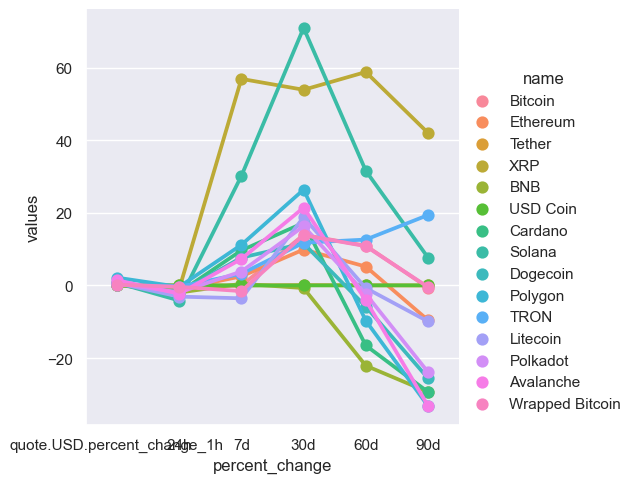

In [38]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [46]:
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price']]
#df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price
0,Bitcoin,30237.14155
1,Ethereum,1912.88001
2,Tether,1.00045
3,XRP,0.74057
4,BNB,243.79777
5,USD Coin,1.00037
6,Cardano,0.31457
7,Solana,27.11083
8,Dogecoin,0.06968
9,Polygon,0.78586


<Axes: xlabel='name', ylabel='quote.USD.price'>

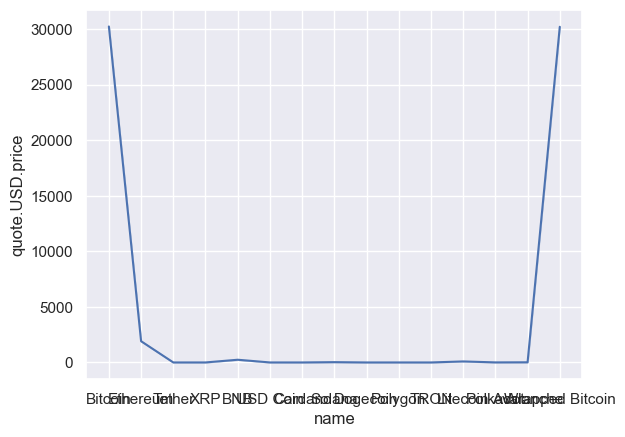

In [44]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='name', y='quote.USD.price', data = df10)